In [5]:
%matplotlib inline
import numpy as np
import cv2
from PIL import ImageFont, ImageDraw, Image, ImageColor
import can
from threading import Thread
import time
import matplotlib.pyplot as plt

TXT_WHT = (255,255,255,255)
TXT_BLU = (255,0,0,255)
TXT_RED = (0,0,255,255)
TXT_GRN = (0,255,0,255)
TXT_WHT50 = (255,255,255,128)
TXT_WHT25 = (255,255,255,64)
TXT_WHT75 = (255,255,255,192)
TXT_ORG = (0,128,255,255)

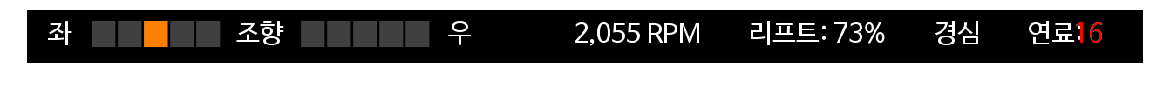

In [40]:
initx = 70
inity = 5
int1 = 30
int2 = 120
stPos = {}

for i in range(10):
    stPos[i] = (initx+(int1*i), inity)
    if i >= 5:
        stPos[i] = (initx+(int1*(i-1))+int2, inity)

t1Pos = (25, 10)
t2Pos = (600, 10)
t3Pos = (1200, 10)
txPos = [(25,10), (600,10), (1200,10)]

text_frame = np.zeros((60, 640*2, 3), np.uint8)

can_data = ["경심", 2, 3, 2055, 73, 16]
fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"

# Text
text1 = "좌                           조향                           우"
engineRPM ="{:,}".format(can_data[3])
text2 = "\t%s RPM\t\t리프트: %d%%\t\t%s\t\t연료: " % (engineRPM, can_data[4], can_data[0])
text3 = "%d" % can_data[5]



# Text Color
t2Col = TXT_WHT
if (can_data[5] <= 20): t3Col = TXT_RED
else: t3Col = TXT_WHT

# Text Font
font = ImageFont.truetype(fontpath, 30)
font2 = ImageFont.truetype(fontpath, 40)
# Drawing Text
frame_pil = Image.fromarray(text_frame).convert('RGBA')
txt_new = Image.new('RGBA', frame_pil.size, (255,255,255,0))
d_txt = ImageDraw.Draw(txt_new)


# Steering part
s_cmap = [TXT_WHT25] * 11
s_cmap[can_data[2]] = TXT_ORG

d_txt.text(t1Pos, text1, font=font, fill=TXT_WHT)
for i in range(len(s_cmap)-1):
    d_txt.text(stPos[i], "█", font=font2, fill=s_cmap[i+1])



d_txt.text(t2Pos, text2, font=font, fill=t2Col)
d_txt.text(t3Pos, text3, font=font, fill=t3Col)
frame_pil = Image.alpha_composite(frame_pil, txt_new)
#draw = ImageDraw.Draw(frame_pil)
#draw.text(t2Pos, text2, font=font, fill=t2Col)
#draw.text(t3Pos, text3, font=font, fill=t3Col)

show_frame = np.array(frame_pil)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(show_frame, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
test = ["%s RPM"%"{:,}".format(can_data[3]), "리프트: %d%%"%can_data[4], "연료:", "%d"%can_data[5]]

In [46]:
print(test[0], test[1], test[2], test[3])

2,055 RPM 리프트: 73% 연료: 16
